In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data
You might get a `DtypeWarning`; ignore it now, if necessary, deal with it later.

In [240]:
# Loading the raw dataset
df = pd.read_csv('LendingClub_wi3435TU.csv')

C:\Users\neagu\AppData\Local\Temp\ipykernel_28440\1303556865.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LendingClub_wi3435TU.csv')


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217452 entries, 0 to 217451
Columns: 124 entries, id to settlement_term
dtypes: float64(88), int64(1), object(35)
memory usage: 205.7+ MB


#### Loading the data dictionary
The field descriptions are read in as a Pandas data frame and then extended to a (Pandas) data frame `preview` for a first peek at the data.

In [242]:
pd.set_option('max_colwidth', 1200) # controls output width; might need adjustment
data_dictionary = pd.read_csv('LCDataDictionary.csv') # Loading in the data dictionary
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
data_dictionary.head()

,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [243]:
# generate preview names + dtypes + first values + descriptions
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['name'] = df_dtypes['index']
df_dtypes = df_dtypes[['name','dtypes']]
df_dtypes['first value'] = df.loc[0].values
preview = df_dtypes.merge(data_dictionary, on='name',how='left')

In [244]:
preview[35:47]

,name,dtypes,first value,description
35,last_pymnt_amnt,float64,4361.82,Last total payment amount received
36,next_pymnt_d,object,NaN,Next scheduled payment date
37,last_credit_pull_d,object,Sep-2018,The most recent month LC pulled credit for this loan
38,collections_12_mths_ex_med,float64,0.0,Number of collections in 12 months excluding medical collections
39,policy_code,float64,1.0,publicly available policy_code=1\nnew products not publicly available policy_code=2
40,application_type,object,Individual,Indicates whether the loan is an individual application or a joint application with two co-borrowers
41,annual_inc_joint,float64,NaN,The combined self-reported annual income provided by the co-borrowers during registration
42,dti_joint,float64,NaN,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"
43,verification_status_joint,object,NaN,NaN
44,acc_now_delinq,float64,0.0,The number of accounts on which the borrower is now delinquent.


## Features with a lot of missing values
A global investigation into the missing values, using `plt.hist` from Matplotlib.

In [245]:
# Overall fraction of null values in the data
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.31231605135846074

Number of fields with more than 10% NAs: 40
Number of fields with less than 1%% NAs: 74


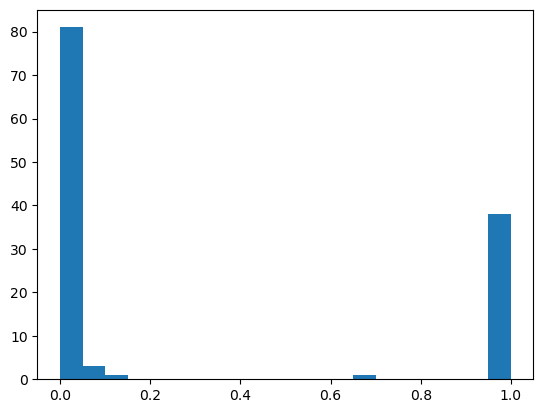

In [246]:
# create overview of distribution of NAs over the variables:
nullfrac= df.isnull().sum()/df.shape[0]
plt.hist(nullfrac,bins=20)
print("Number of fields with more than 10% NAs:", sum(nullfrac>0.10))
print("Number of fields with less than 1%% NAs:", sum(nullfrac<0.001))

In [247]:
# Example of how to drop the feature from a list
drop_list = ['member_id']

# Dropping all features that are missing more than 25% values missing
#drop_list = [item for item in nullfrac.index if nullfrac[item] >= 0.25]
df.drop(drop_list, axis=1, inplace=True)

In [248]:
df.shape

(217452, 123)

## Filtering on loan_status

In [249]:
df['loan_status'].value_counts()

Fully Paid            112409
Current                67079
Charged Off            34358
Late (31-120 days)      2252
In Grace Period          885
Late (16-30 days)        461
Default                    8
Name: loan_status, dtype: int64

In [250]:
# value counts, this time fancy in a Pandas data frame
meaning = [
"Loan has been fully paid off.",
"Loan is up to date on current payments.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = df["loan_status"].value_counts().index, df["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Fully Paid,112409,Loan has been fully paid off.
1,Current,67079,Loan is up to date on current payments.
2,Charged Off,34358,Loan for which there is no longer a reasonable expectation of further payments.
3,Late (31-120 days),2252,Loan hasn't been paid in 31 to 120 days (late on the current payment).
4,In Grace Period,885,The loan is past due but still in the grace period of 15 days.
5,Late (16-30 days),461,Loan hasn't been paid in 16 to 30 days (late on the current payment).
6,Default,8,Loan is defaulted on and no payment has been made for more than 121 days.


In [251]:
# Example of how you might do this. Complete? YES, further filtered loans on "Default"
df = df[(df["loan_status"] == "Fully Paid") | (df["loan_status"] == "Charged Off") | (df["loan_status"] == "Default")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0, "Default": 0}}
df = df.replace(mapping_dictionary)
print(df.columns)

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=123)


## Preventing leakage

In [257]:
# collect list of features that are not available at the application date
drop_list1 = ['last_pymnt_amnt', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']
df.drop(drop_list1, axis=1, inplace=True)

## Dropping features of no/little predictive value

In [259]:
# COMPLETE!
drop_list2 = ['id','disbursement_method', 'collections_12_mths_ex_med', 'desc', 'emp_title', 'issue_d', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'purpose', 'title', 'url', 'zip_code']
df.drop(drop_list2, axis=1, inplace=True)

## Unbalanced features

In [ ]:
# an example of how to look at some value-counts
for col in df.columns[26:31]:
    print(df[col].value_counts())
    print()

In [ ]:
# Example
drop_list3 = ['initial_list_status']
df.drop(drop_list3, axis=1, inplace=True)

## Highly correlated features

In [ ]:
# Checking correlation and using heatmap to visualise it.
# First select a subset of the columns to keep the size of the correlation matrix low
# Output looks a bit strange, is it OK?
select = list(df.columns[45:65])     
dfsel = df[select]
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('whitegrid')
# Compute correlations and plot heatmap (exclude non-numeric features)
correlations = dfsel.corr(numeric_only=True)
sns.heatmap(correlations,annot=True)
plt.show()

## Getting rid of the remaining missing values
Upon first running, before (many) features have been dropped, the list below might/will still contain a large number of feature, many with a large number of missing values. This might indicate you have not cleaned enough in the earlier stages.

In [193]:
df.shape

(146775, 123)

In [202]:
# Create dataframe of null-counts and look at the numbers
# This only makes sense when you have done most of the other cleaning
NAcount= df.isnull().sum()
# Counting features that have more than 25% of their values missing
hasNAs = NAcount[NAcount >= 0.25 * len(df)]
print("There are", len(hasNAs), "features that have missing values.")
b = pd.DataFrame(hasNAs,columns=['Number of null values'])
b.sort_values(by=['Number of null values'],ascending=False)

There are 38 features that have missing values.
38


In [203]:
# Dropping all features that are missing more than 25% values missing
#drop_list = [item for item in nullfrac.index if nullfrac[item] >= 0.25]
df.drop(b.index, axis=1, inplace=True)

df.shape # check dimensions

(146775, 85)

## Dates
There may or may not be any date features left. Let's check the categorical features still present.

In [ ]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

In [ ]:
# generate list of remaining categorical features
# obcols = list(df.columns[df.dtypes == 'object'])
# obcols

In [ ]:
#for col in obcols:
#    print(preview[preview.name == col][:])

In [ ]:
# this is crummy code ... sorry
pd.set_option('max_colwidth', 20)
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])